**Steps**
- Read Data
- Merge Data
- Fill NaN values
- Convert all features to numeric
- Create Predicted label - less than 180 - 1 else 0
- Univariate Analysis
- Correlation Plot
- Standardise the features (z score or max min scaler) #Not required as recursive partitioning do not need standardisation
- Classes highly imbalanced
- Create train and test set for unbalanced dataset
- Try Unbalanced Random Forest

In [144]:
import os
import math as mh
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# For visualizations
import seaborn as sns
import matplotlib.pyplot as plt
% config InlineBackend.figure_format = 'png'
% matplotlib inline

# For data parsing
from datetime import datetime

# For choosing attributes that have good gaussian distribution
from scipy.stats import shapiro

# Needed for getting parameters for models
from sklearn.cross_validation import LeaveOneOut
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV

# Models
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesClassifier
from sklearn.linear_model import Ridge, Lasso
from sklearn import cluster
from sklearn.neighbors import KNeighborsClassifier

# For scaling/normalizing values
from sklearn.preprocessing import MinMaxScaler

#For splitting data in train and test set; 
from sklearn.model_selection import train_test_split

In [145]:
print(os.getcwd())

C:\Users\Tarun Singh\Documents\R - Analysis\VIP Prediction


In [146]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 4665-8E12

 Directory of C:\Users\Tarun Singh\Documents\R - Analysis\VIP Prediction

12/05/2017  12:15 PM    <DIR>          .
12/05/2017  12:15 PM    <DIR>          ..
12/04/2017  04:05 PM    <DIR>          .ipynb_checkpoints
10/23/2017  03:40 PM            88,318 666.pdf
11/24/2017  04:01 PM            89,989 Connecting Python with MSSQL Server .ipynb
12/05/2017  11:26 AM         1,962,044 daystovip_data_20160101.csv
10/30/2017  01:35 PM         1,764,822 daystovip_data_20160101_register.csv
11/08/2017  02:31 PM            73,514 deposits_201709.csv
10/17/2017  02:50 PM           725,163 deposits_data_20160101.csv
10/30/2017  02:22 PM           822,676 deposits_data_20160101_register.csv
10/24/2017  10:50 AM         3,152,191 Early VIP Predictions - JG - Iteration 1.pdf
11/18/2017  07:05 PM         3,410,483 Early VIP Predictions - JG Test on Sept October 2017.ipynb
12/05/2017  12:07 PM         3,217,109 Early VIP Predictions -

In [147]:
#Read all necessary input files
r2_2017 = pd.read_csv("C:/Users/Tarun Singh/Documents/R - Analysis/VIP Prediction/r2_info_20170101.csv",parse_dates=["firstDepositDate"])
r2_2016 = pd.read_csv("C:/Users/Tarun Singh/Documents/R - Analysis/VIP Prediction/r2info_2016.csv",parse_dates=["firstDepositDate"])
daystovip = pd.read_csv("C:/Users/Tarun Singh/Documents/R - Analysis/VIP Prediction/daystovip_data_20160101.csv")
deposit_data = pd.read_csv("C:/Users/Tarun Singh/Documents/R - Analysis/VIP Prediction/deposits_data_20160101.csv")
withdrawal_data = pd.read_csv("C:/Users/Tarun Singh/Documents/R - Analysis/VIP Prediction/withdrawals_info.csv")

In [148]:
#Merge 2 dataframes r2_info and r2_2016
r2_info = pd.concat([r2_2016, r2_2017],axis=0)
print(r2_info.shape)
print(r2_2016.shape)
print(r2_2017.shape)

(39654, 16)
(28067, 16)
(11587, 16)


In [149]:
print(r2_info.head(5))
print(daystovip.head(5))
print(deposit_data.head(5))
print(withdrawal_data.head(5))

      userID firstDepositDate 7to14_CashGames  7to14_ActiveDays  \
0  1,335,073       2016-05-04               8                 1   
1  1,404,008       2016-06-16               4                 2   
2  1,563,599       2016-09-19             NaN                 1   
3  1,353,705       2016-05-16             NaN                 0   
4  1,447,677       2016-07-12               8                 1   

  7to14_WinCashGames 7to14_LossCashGames 7to14_AvgEntryFee  \
0                  2                   6                 1   
1                  1                   3                17   
2                NaN                 NaN               204   
3                NaN                 NaN               NaN   
4                NaN                   8                33   

   7to14_AvgComposition 7to14_RakeGenerated 14to21_CashGames  \
0                   3.0                 0.5              NaN   
1                   2.0                8.25              NaN   
2                   5.0         

In [150]:
#Merge all the data frames in one on basis of r2 info
#pd.concat
#pd.merge
#r2_info.shape Check dimensions of r2 info
print(r2_info.shape[0])
print(r2_info.dtypes)

39654
userID                           object
firstDepositDate         datetime64[ns]
7to14_CashGames                  object
7to14_ActiveDays                  int64
7to14_WinCashGames               object
7to14_LossCashGames              object
7to14_AvgEntryFee                object
7to14_AvgComposition            float64
7to14_RakeGenerated              object
14to21_CashGames                 object
14to21_ActiveDays                 int64
14to21_WinCashGames              object
14to21_LossCashGames             object
14to21_AvgEntryFee               object
14to21_AvgComposition           float64
14to21_RakeGenerated             object
dtype: object


In [151]:
final_df = pd.merge(r2_info,deposit_data,on='userID',how='left') #Merge deposit data
final_df = pd.merge(final_df,withdrawal_data,on='userID',how='left') #Merge withdrawal data
final_df = pd.merge(final_df,daystovip,left_on='userID', right_on='userid',how='left') #Merge days to vip data

In [152]:
final_df.dtypes

userID                           object
firstDepositDate         datetime64[ns]
7to14_CashGames                  object
7to14_ActiveDays                  int64
7to14_WinCashGames               object
7to14_LossCashGames              object
7to14_AvgEntryFee                object
7to14_AvgComposition            float64
7to14_RakeGenerated              object
14to21_CashGames                 object
14to21_ActiveDays                 int64
14to21_WinCashGames              object
14to21_LossCashGames             object
14to21_AvgEntryFee               object
14to21_AvgComposition           float64
14to21_RakeGenerated             object
First_Deposit                    object
7to14_DepositsAmount             object
7to14_DepositsCount             float64
14to21_DepositsAmount            object
14to21_DepositsCount            float64
7to14_WdhAmount                  object
7to14_WdhCount                  float64
14to21_WdhAmount                 object
14to21_WdhCount                 float64


In [153]:
print(r2_info.shape[0])
#Check dimensions of final_df should be same as r2_info
final_df.head(5)

39654


,userID,firstDepositDate,7to14_CashGames,7to14_ActiveDays,7to14_WinCashGames,7to14_LossCashGames,7to14_AvgEntryFee,7to14_AvgComposition,7to14_RakeGenerated,14to21_CashGames,...,7to14_DepositsAmount,7to14_DepositsCount,14to21_DepositsAmount,14to21_DepositsCount,7to14_WdhAmount,7to14_WdhCount,14to21_WdhAmount,14to21_WdhCount,userid,DaystoVIP
0,"1,335,073",2016-05-04,8,1,2,6,1,3.0,0.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,335,073",-1
1,"1,404,008",2016-06-16,4,2,1,3,17,2.0,8.25,NaN,...,NaN,NaN,NaN,NaN,"3,900",1.0,0,0.0,"1,404,008",-1
2,"1,563,599",2016-09-19,NaN,1,NaN,NaN,204,5.0,6.08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,563,599",-1
3,"1,353,705",2016-05-16,NaN,0,NaN,NaN,NaN,NaN,NaN,111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,353,705",-1
4,"1,447,677",2016-07-12,8,1,NaN,8,33,6.0,10.19,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,447,677",-1


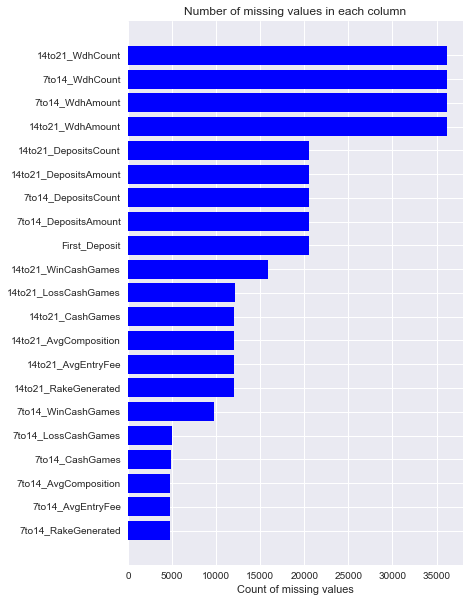

In [154]:
#Check the NaN values in each column, plot and fill with 0
#print(final_df.isnull().sum().T) 
missing_df = final_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(6,10))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [155]:
#Replace all NaN with 0
final_df=final_df.fillna(0)
#Check for NaN values
final_df.sum()
#Remove column userid
final_df = final_df.drop('userid',axis=1)
#Convert all columns to numeric except userid and firstDeposit Date

In [156]:
#Remove comma from each column of df
#Get list of columns in df
col_names = final_df.columns
newdf= final_df[col_names].replace({',':''}, regex = True)

#Convert all columns except 1 and 2 to float
newdf= newdf.iloc[:, np.r_[2:newdf.shape[1]]].astype(float)

#Append userid to newdf
newdf['UserID']=final_df['userID']
newdf['firstDepositDate'] = final_df['firstDepositDate']
newdf.head(5)

,7to14_CashGames,7to14_ActiveDays,7to14_WinCashGames,7to14_LossCashGames,7to14_AvgEntryFee,7to14_AvgComposition,7to14_RakeGenerated,14to21_CashGames,14to21_ActiveDays,14to21_WinCashGames,...,7to14_DepositsCount,14to21_DepositsAmount,14to21_DepositsCount,7to14_WdhAmount,7to14_WdhCount,14to21_WdhAmount,14to21_WdhCount,DaystoVIP,UserID,firstDepositDate
0,8.0,1.0,2.0,6.0,1.0,3.0,0.50,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,"1,335,073",2016-05-04
1,4.0,2.0,1.0,3.0,17.0,2.0,8.25,0.0,0.0,0.0,...,0.0,0.0,0.0,3900.0,1.0,0.0,0.0,-1.0,"1,404,008",2016-06-16
2,0.0,1.0,0.0,0.0,204.0,5.0,6.08,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,"1,563,599",2016-09-19
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,111.0,3.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,"1,353,705",2016-05-16
4,8.0,1.0,0.0,8.0,33.0,6.0,10.19,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,"1,447,677",2016-07-12


In [157]:
newdf['DaystoVIP'].value_counts()
#People who became VIP in less than 180 days then mark them as 1 - Successfull else 0 - Unsuccessfull
#Create new column VIPin180
newdf['VIPin180'] = np.where((newdf['DaystoVIP'] >= 1) & (newdf['DaystoVIP'] <= 180),1,0)

In [158]:
#newdf.sort_values(by='DaystoVIP', ascending='True')
newdf[newdf['VIPin180']==1]
newdf['VIPin180'].value_counts()

0    39114
1      540
Name: VIPin180, dtype: int64

In [159]:
newdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
7to14_CashGames,39654.0,103.737252,176.055129,0.0,5.00,33.000,124.0000,2255.00
7to14_ActiveDays,39654.0,3.062591,2.279781,0.0,1.00,3.000,5.0000,7.00
7to14_WinCashGames,39654.0,31.952565,61.762008,0.0,1.00,9.000,35.0000,1082.00
7to14_LossCashGames,39654.0,71.782166,119.801880,0.0,4.00,24.000,87.0000,1622.00
7to14_AvgEntryFee,39654.0,69.907374,264.681032,0.0,3.00,9.000,34.0000,9497.00
7to14_AvgComposition,39654.0,3.858249,1.921821,0.0,2.00,4.000,5.0000,6.00
7to14_RakeGenerated,39654.0,431.816654,2773.418875,0.0,2.38,22.485,132.2625,161166.55
14to21_CashGames,39654.0,94.056186,189.329250,0.0,0.00,15.000,99.0000,3149.00
14to21_ActiveDays,39654.0,2.674081,2.701734,0.0,0.00,2.000,5.0000,8.00
14to21_WinCashGames,39654.0,29.198946,65.469353,0.0,0.00,3.000,28.0000,1145.00


***Univariate Analysis***

In [160]:
#Split features into continuous and categorical 
newdf.columns
continuous= ['7to14_CashGames', '7to14_ActiveDays', '7to14_WinCashGames',
       '7to14_LossCashGames', '7to14_AvgEntryFee', '7to14_AvgComposition',
       '7to14_RakeGenerated', '14to21_CashGames', '14to21_ActiveDays',
       '14to21_WinCashGames', '14to21_LossCashGames', '14to21_AvgEntryFee',
       '14to21_AvgComposition', '14to21_RakeGenerated', 'First_Deposit',
       '7to14_DepositsAmount', '7to14_DepositsCount', '14to21_DepositsAmount',
       '14to21_DepositsCount', '7to14_WdhAmount', '7to14_WdhCount',
       '14to21_WdhAmount', '14to21_WdhCount']

categorical = ['VIPin180']

In [161]:
categorical

['VIPin180']

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


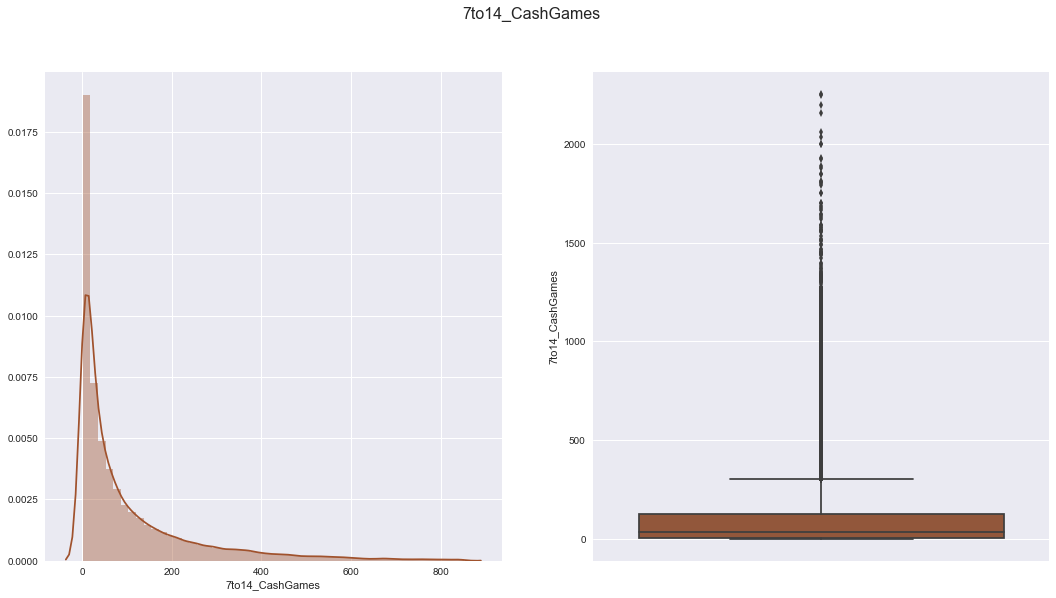

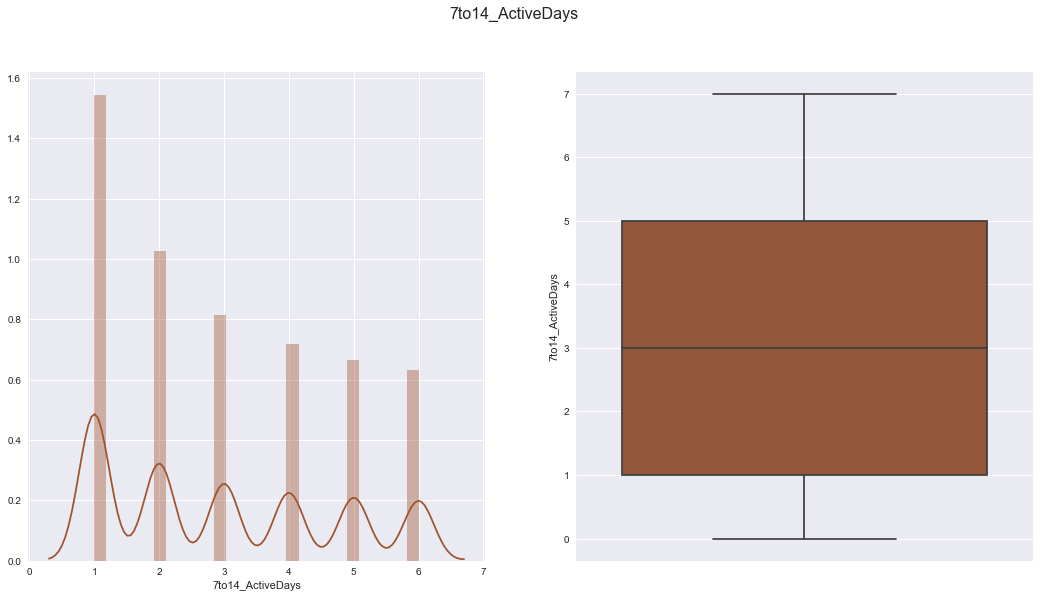

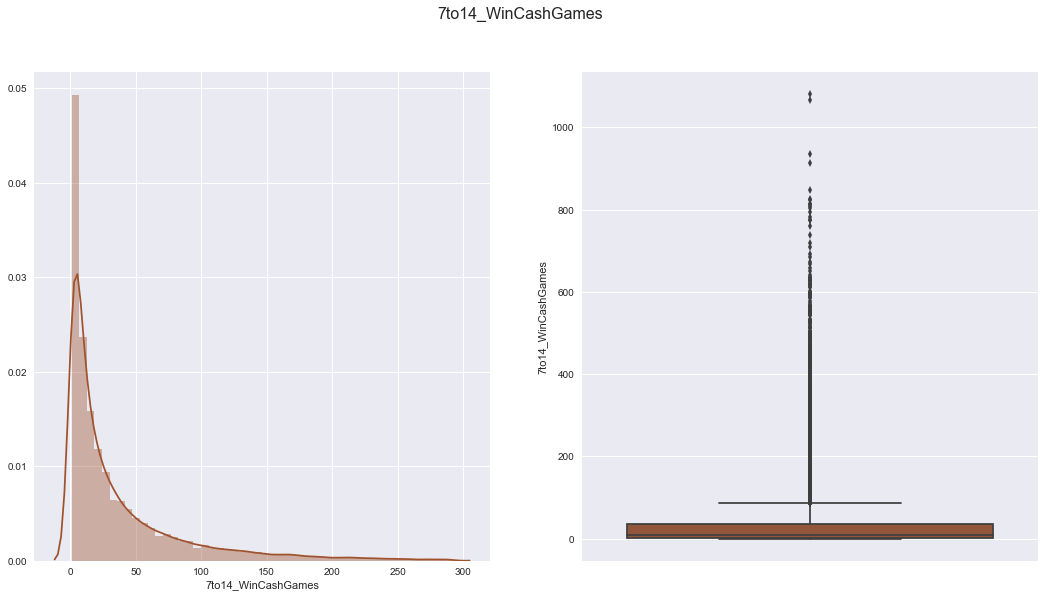

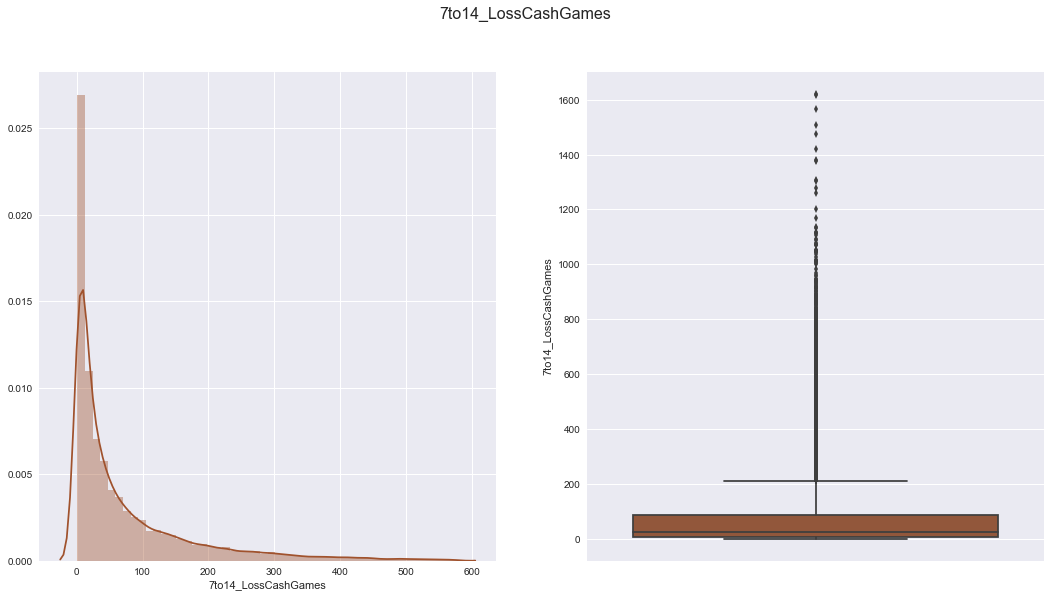

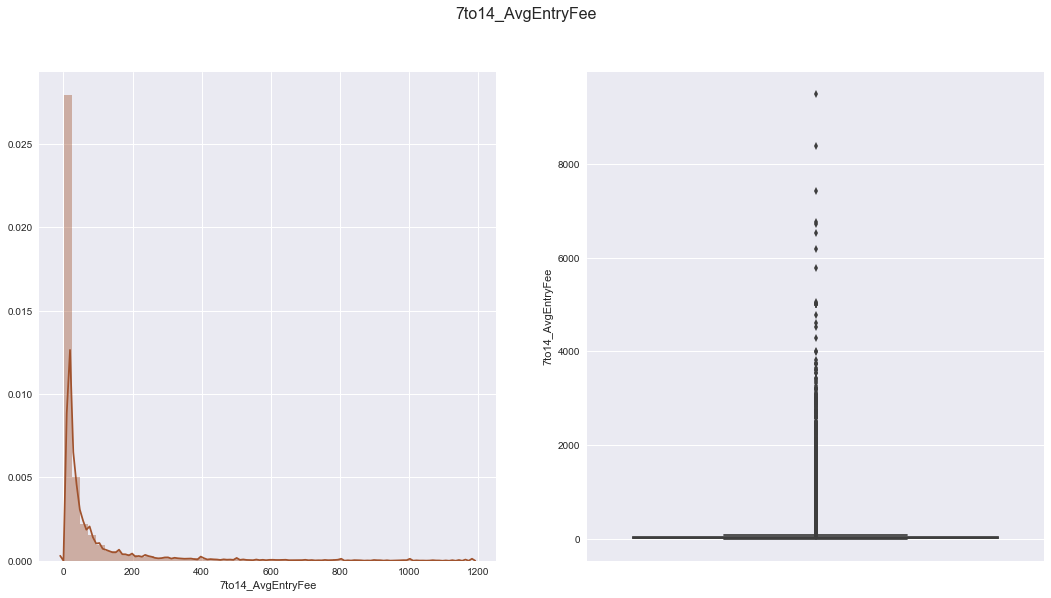

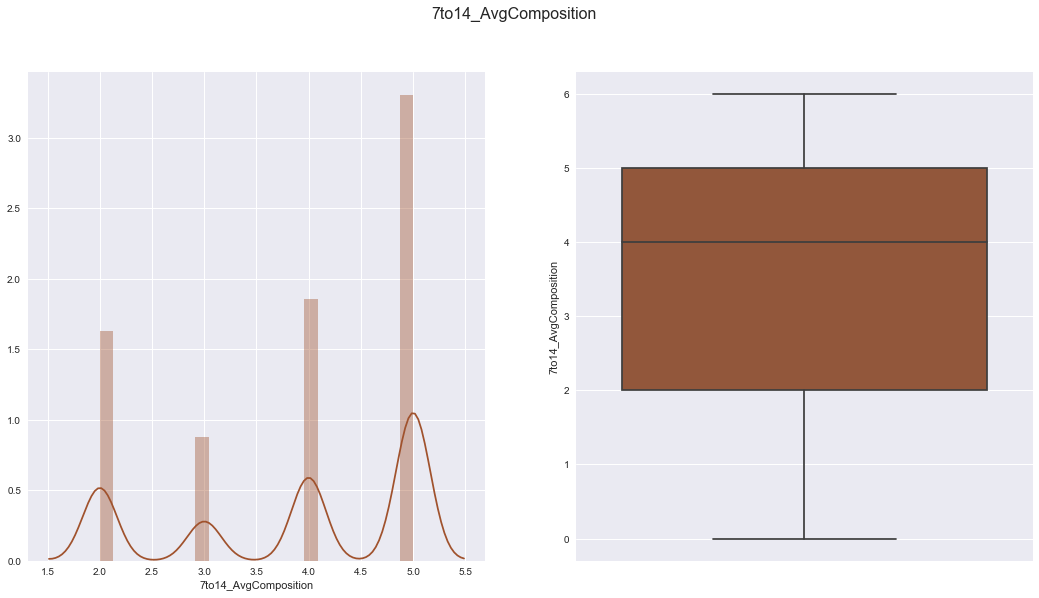

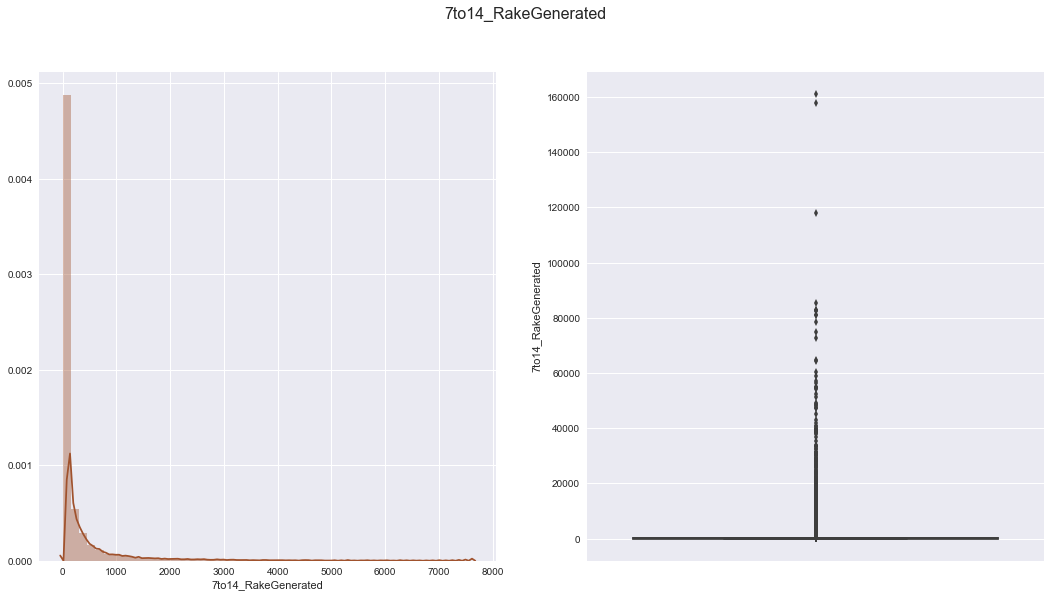

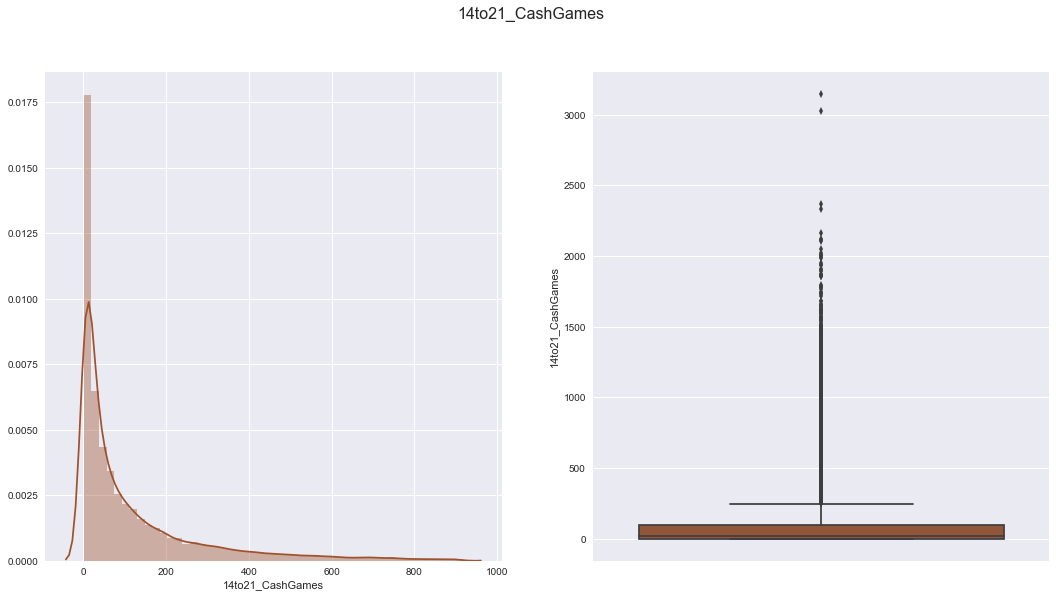

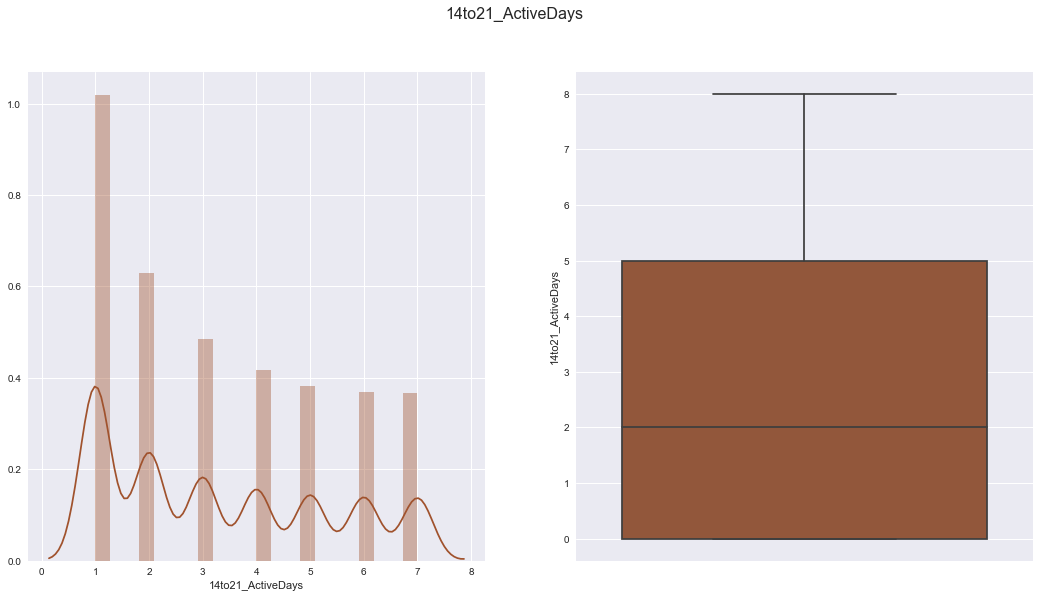

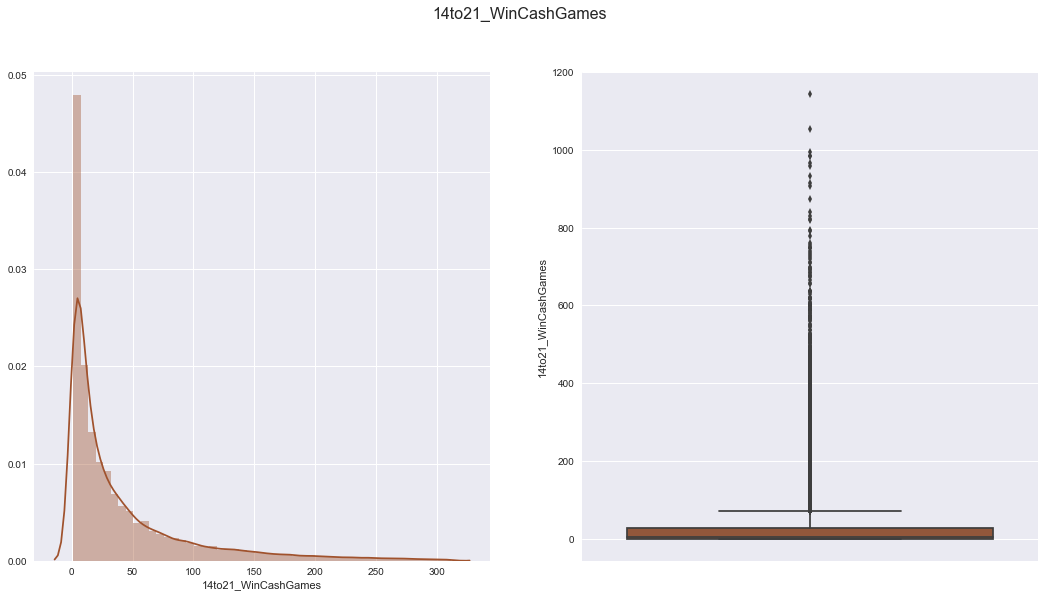

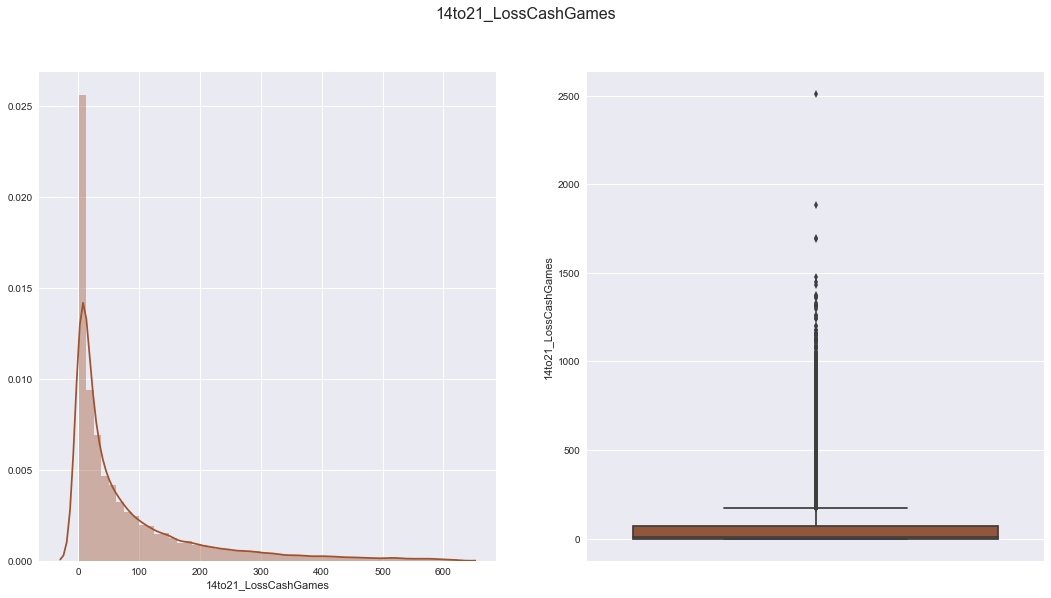

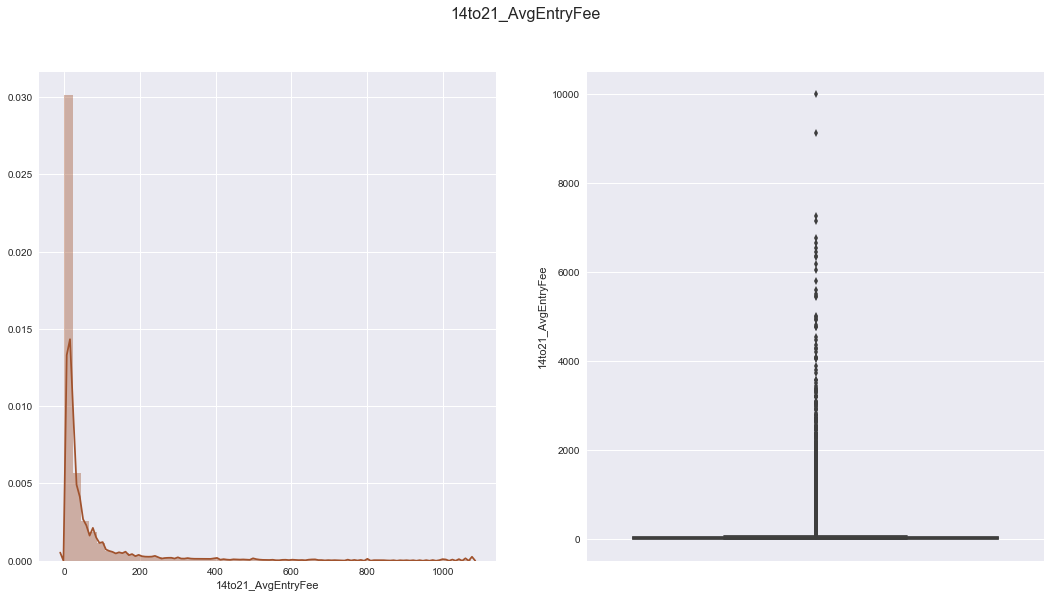

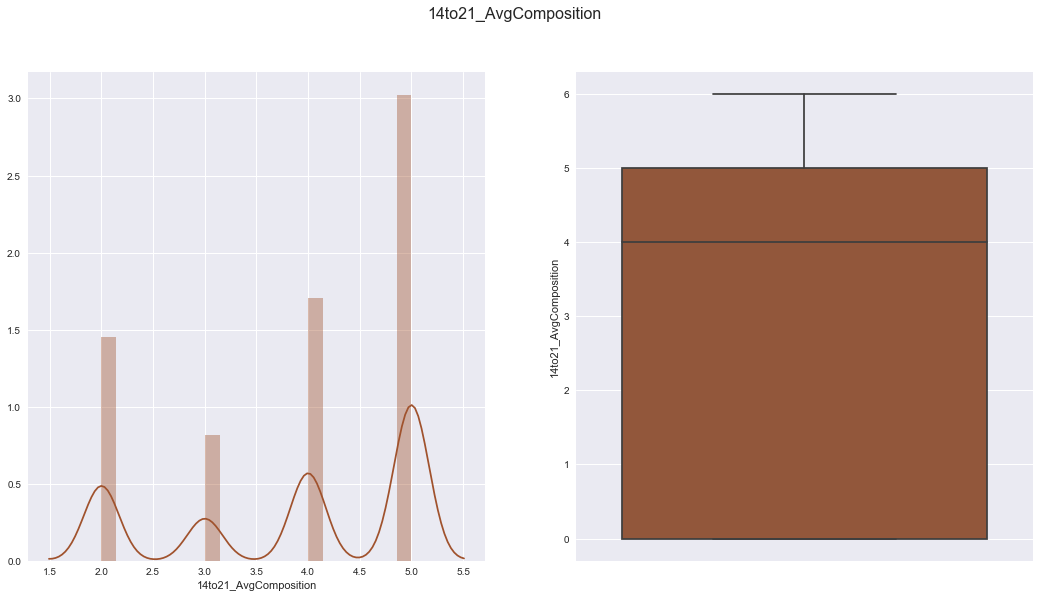

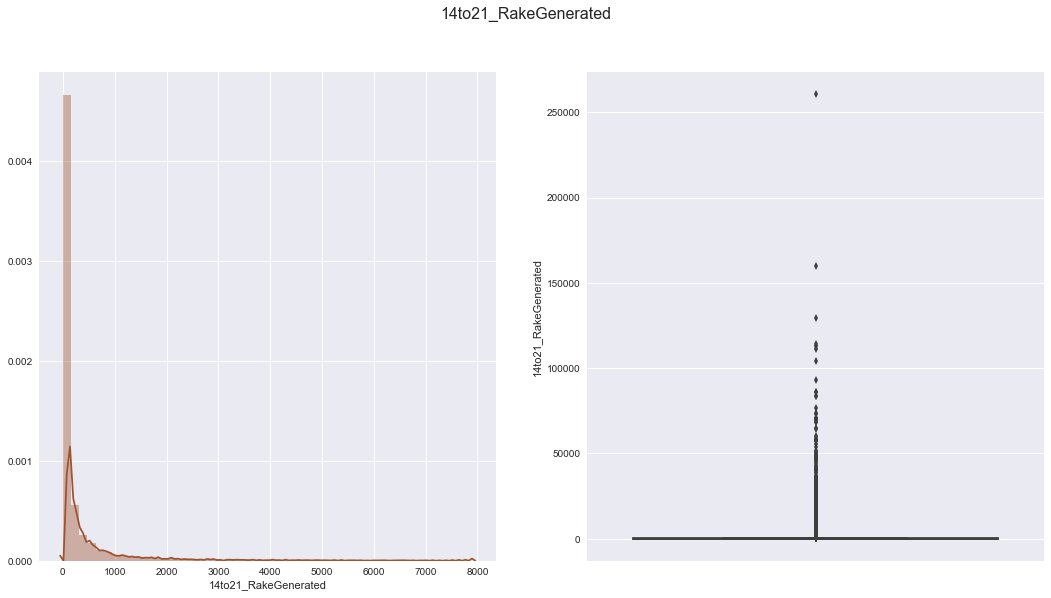

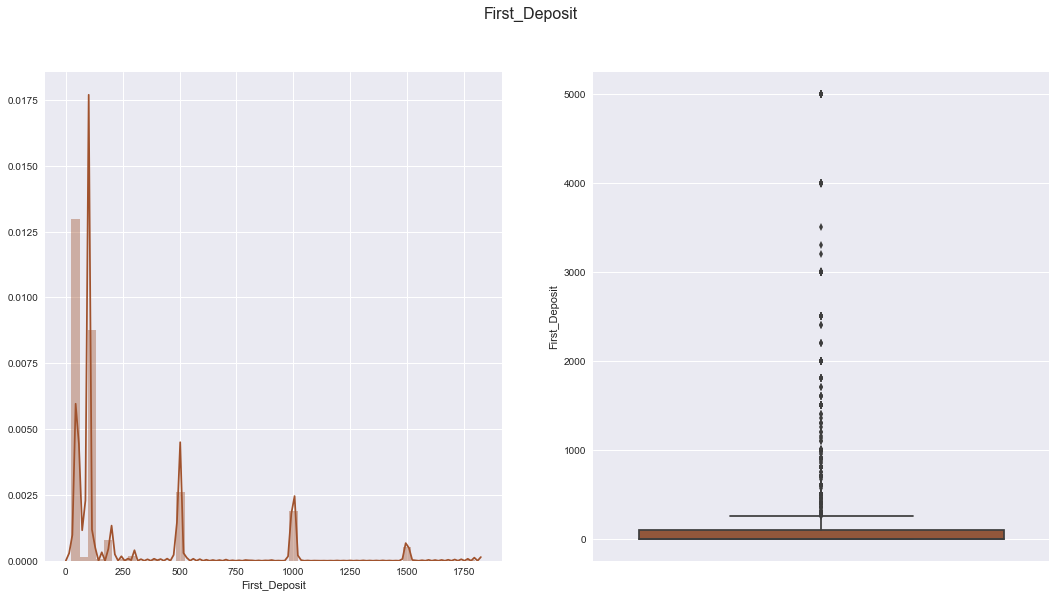

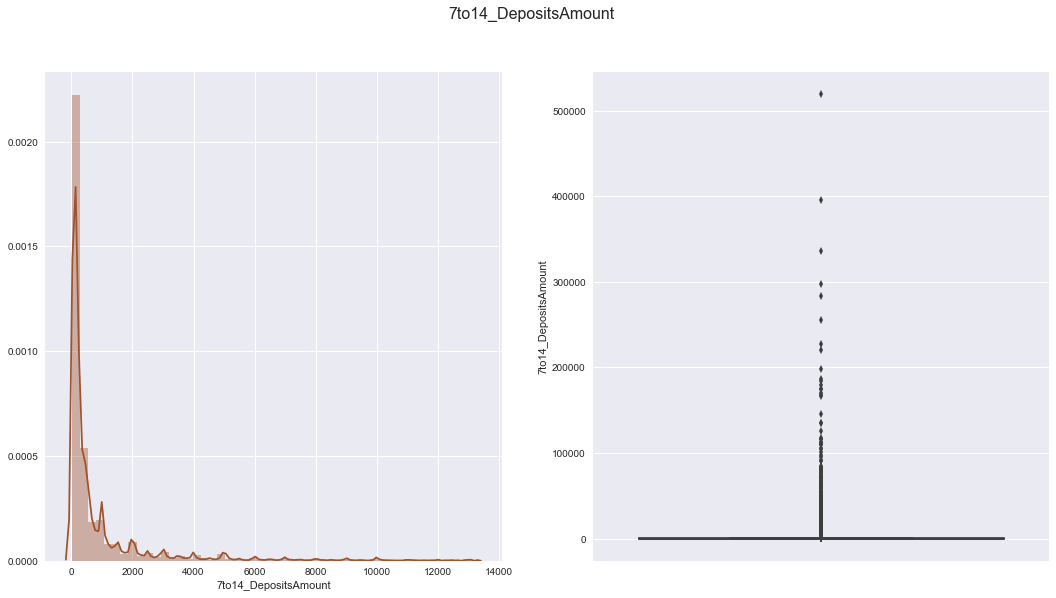

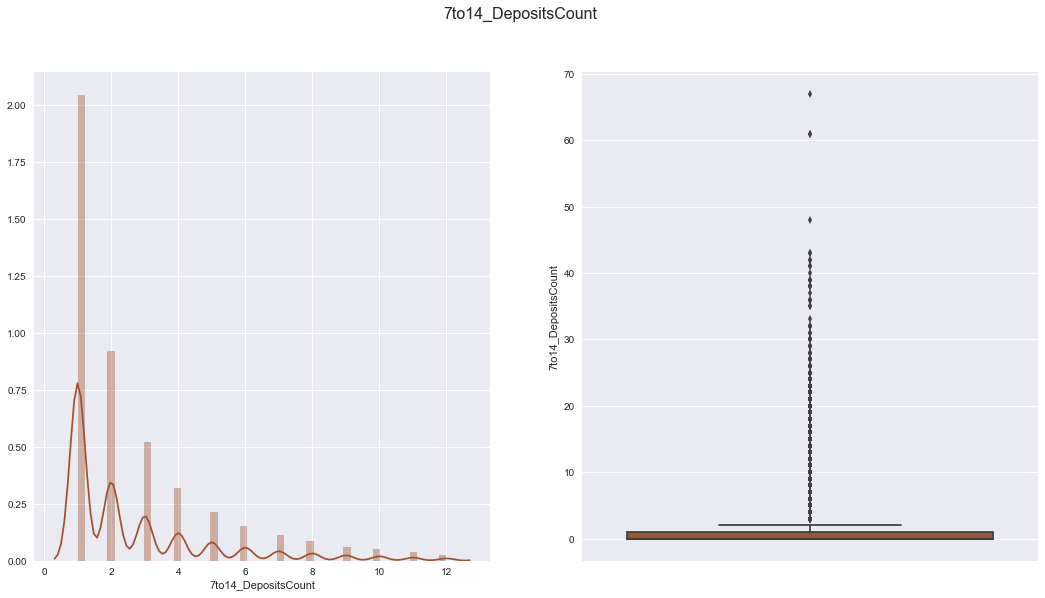

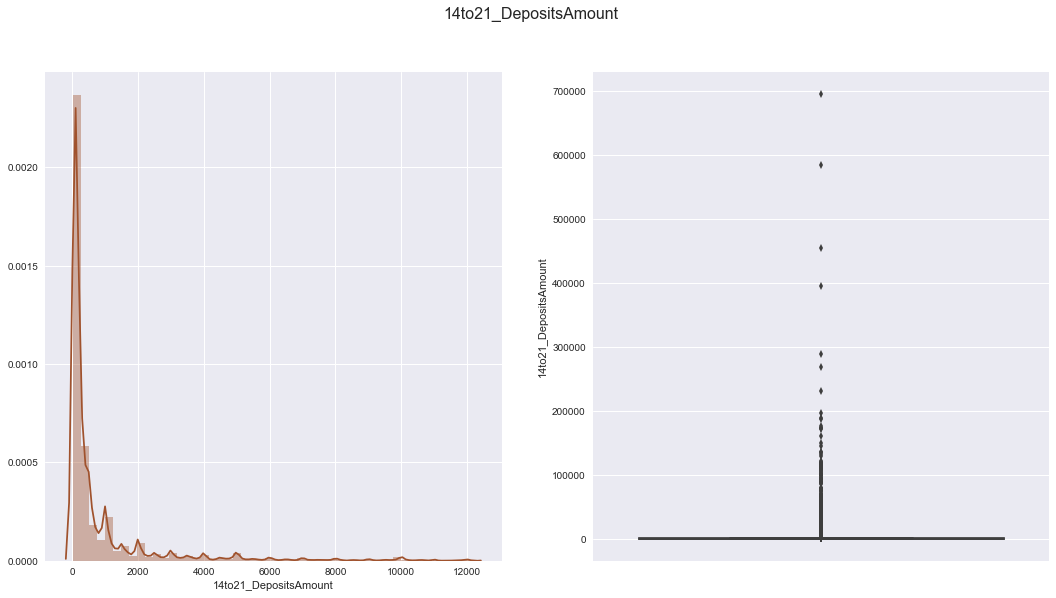

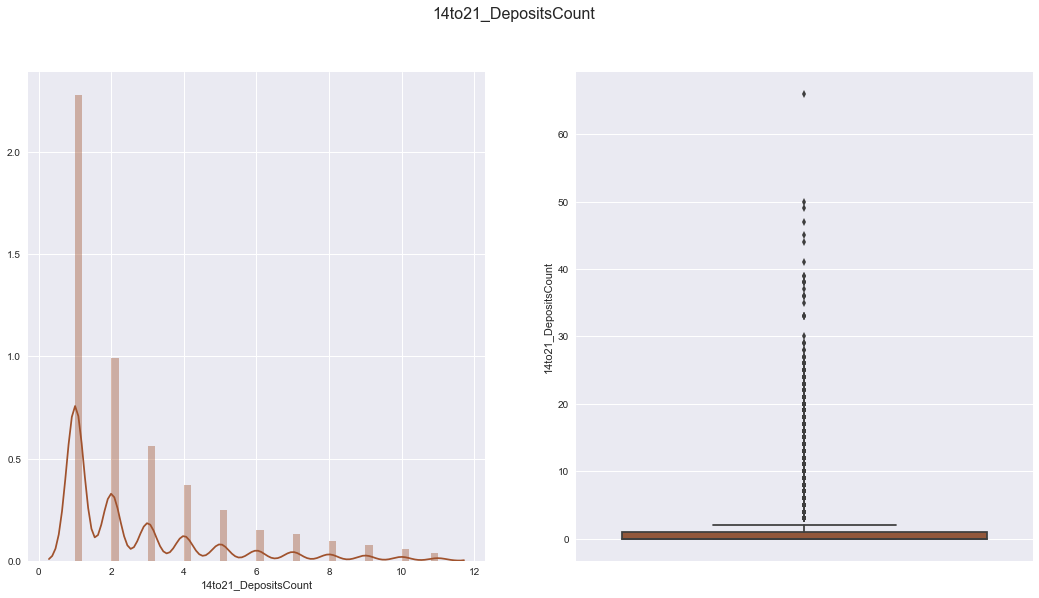

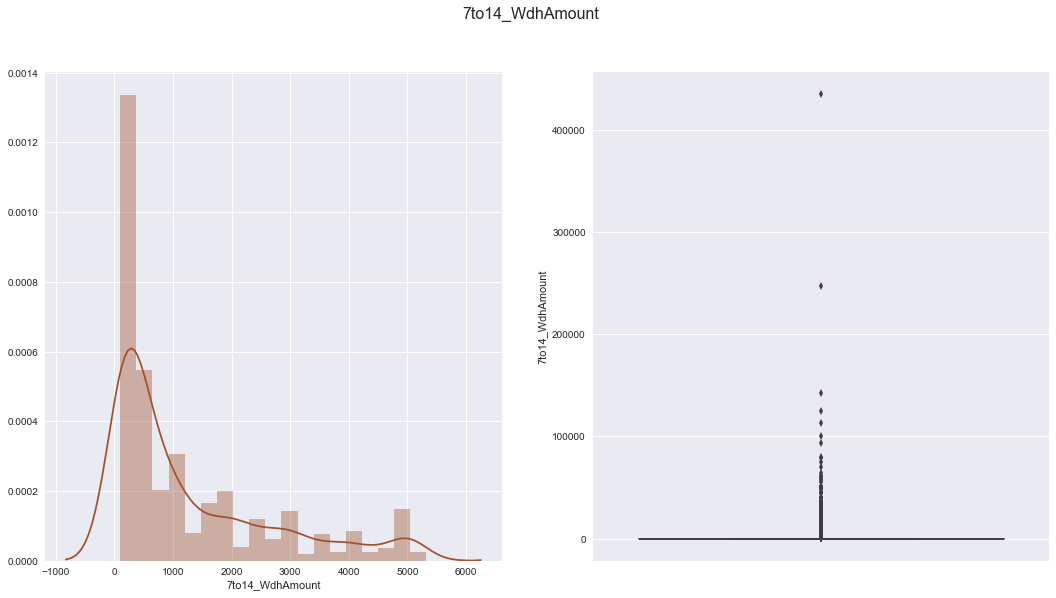

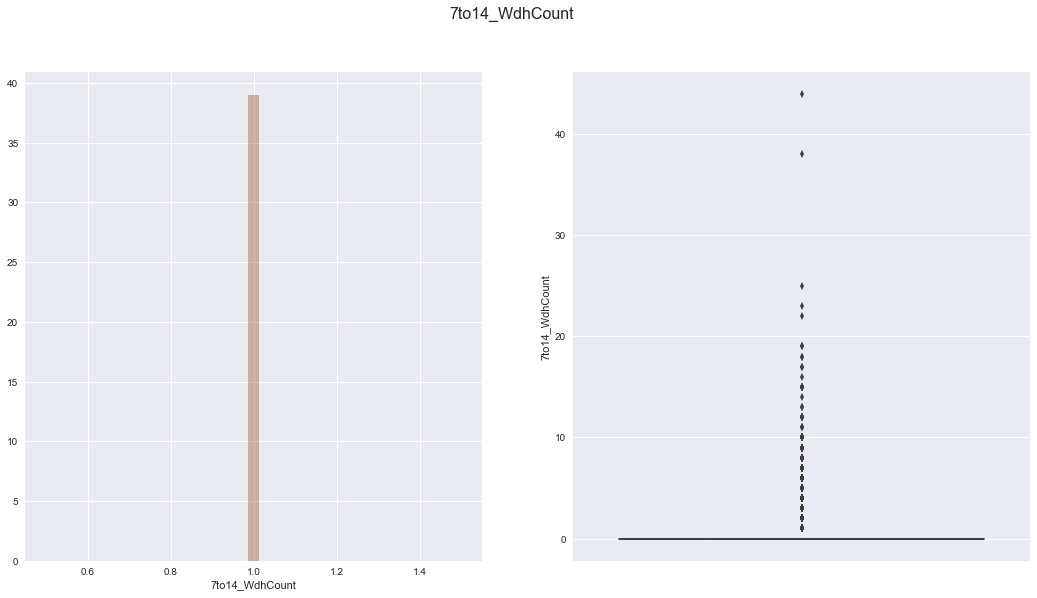

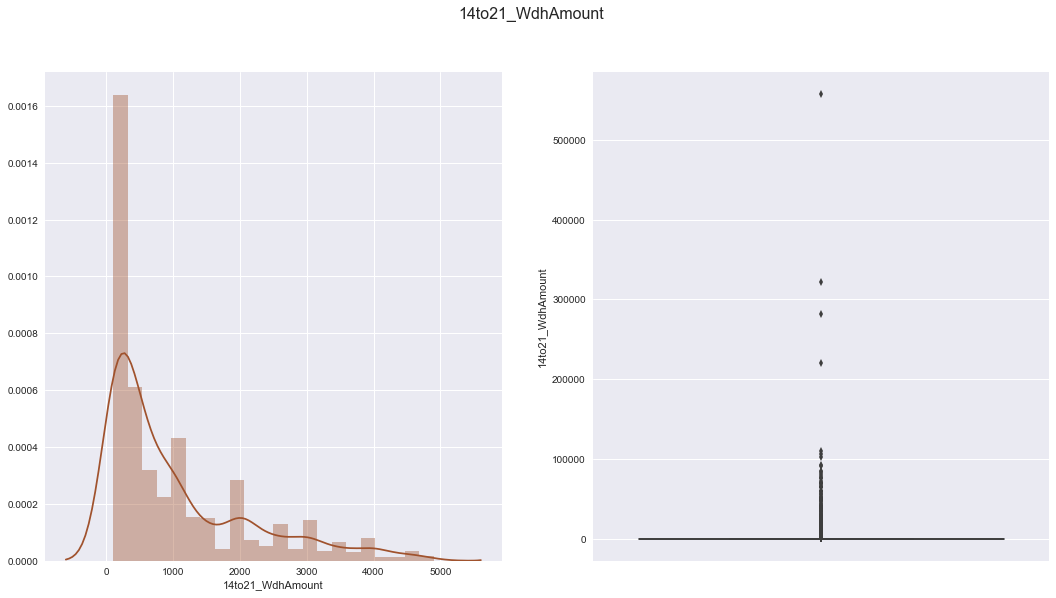

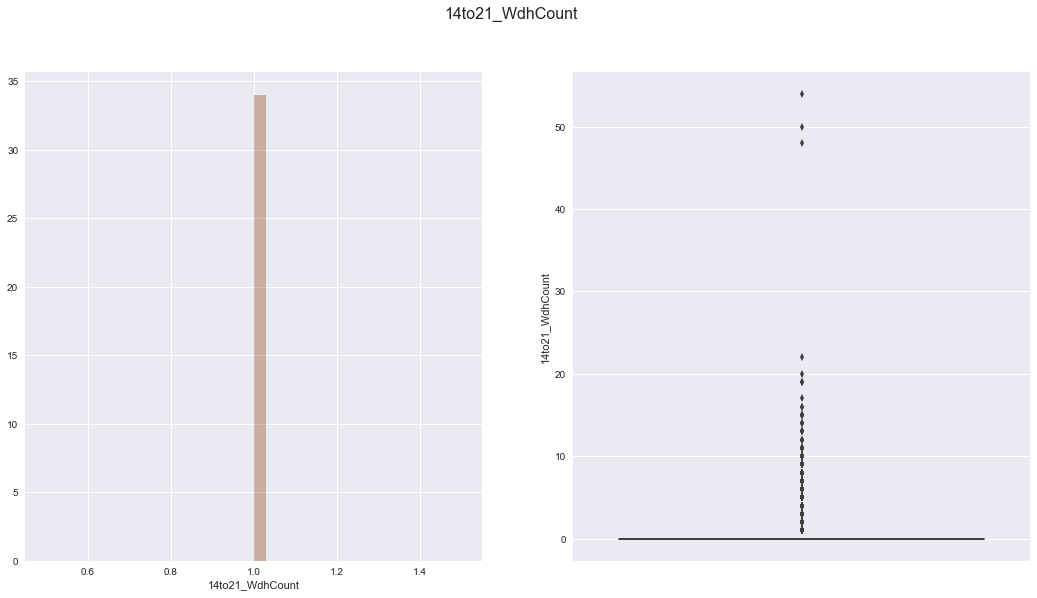

In [162]:
### Continuous variable plots
for col in continuous:
    values = newdf[col].dropna()
    lower = np.percentile(values, 1)
    upper = np.percentile(values, 99)
    fig = plt.figure(figsize=(18,9));
    sns.distplot(values[(values>lower) & (values<upper)], color='Sienna', ax = plt.subplot(121));
    sns.boxplot(y=values, color='Sienna', ax = plt.subplot(122));
    plt.suptitle(col, fontsize=16)    

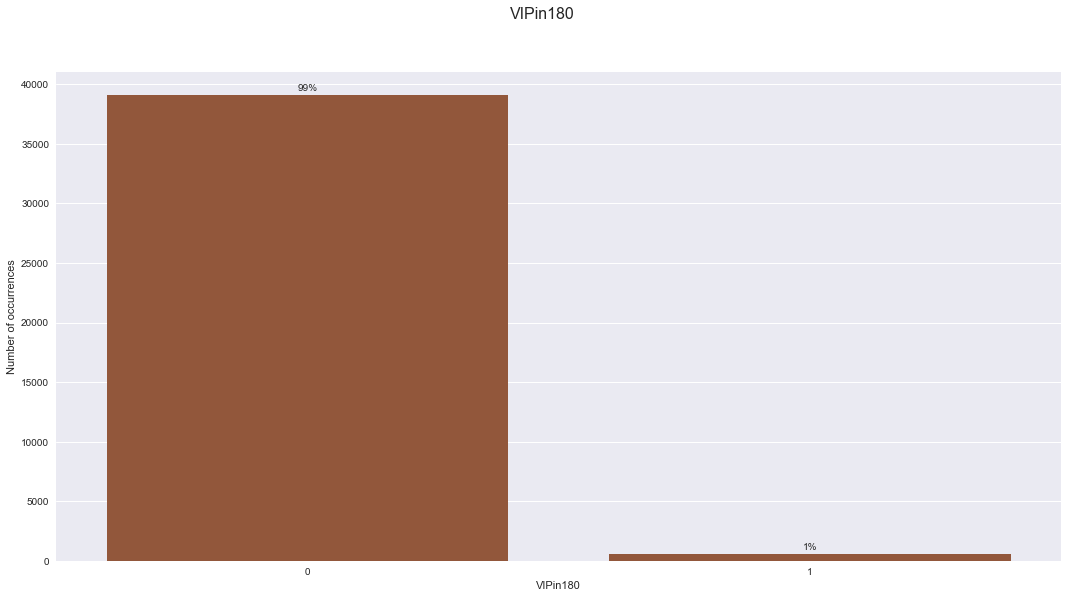

In [163]:
### Categorical variable plots
for col in categorical:
    values = newdf[col].astype('str').value_counts(dropna=False).to_frame().reset_index()
    if len(values) > 30:
        continue
    values.columns = [col, 'counts']
    fig = plt.figure(figsize=(18,9))
    ax = sns.barplot(x=col, y='counts', color='Sienna', data=values, order=values[col]);
    plt.xlabel(col);
    plt.ylabel('Number of occurrences')
    plt.suptitle(col, fontsize=16)

    ### Adding percents over bars
    height = [p.get_height() for p in ax.patches]    
    total = sum(height)
    for i, p in enumerate(ax.patches):    
        ax.text(p.get_x()+p.get_width()/2,
                height[i]+total*0.01,
                '{:1.0%}'.format(height[i]/total),
                ha="center")    

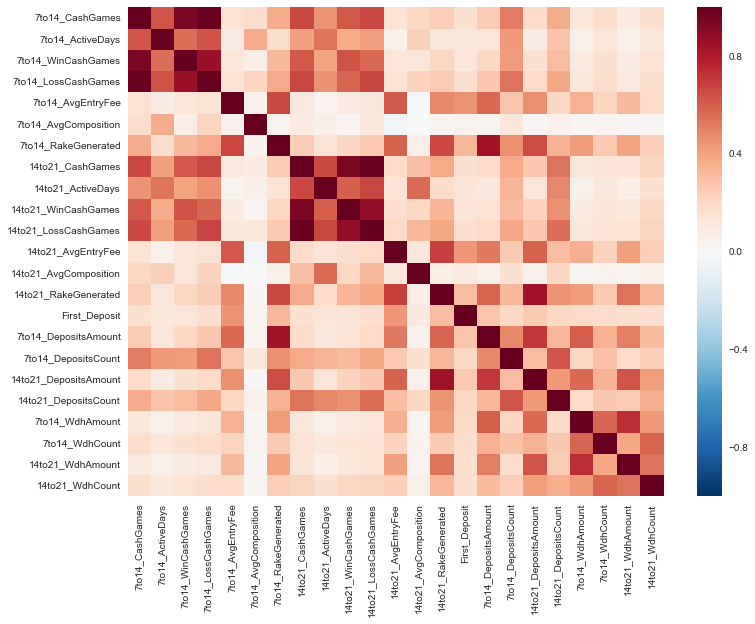

In [164]:
#Correlation Plot for continuous variables
# calculate the correlation matrix
corr = newdf[continuous].corr()
#print(corr)

# plot the heatmap
fig = plt.figure(figsize=(12,9))
sns.heatmap(corr)

In [165]:
#Melt and pivot down corr 
print(corr)
#m = pd.melt(corr, id_vars='var_name='Name')
#print(m)

                       7to14_CashGames  7to14_ActiveDays  7to14_WinCashGames  \
7to14_CashGames               1.000000          0.631235            0.940631   
7to14_ActiveDays              0.631235          1.000000            0.561041   
7to14_WinCashGames            0.940631          0.561041            1.000000   
7to14_LossCashGames           0.984572          0.638373            0.866727   
7to14_AvgEntryFee             0.150369          0.083416            0.131418   
7to14_AvgComposition          0.180137          0.371086            0.076045   
7to14_RakeGenerated           0.372455          0.177764            0.326224   
14to21_CashGames              0.667114          0.410497            0.612075   
14to21_ActiveDays             0.452155          0.540548            0.400774   
14to21_WinCashGames           0.620344          0.368694            0.638207   
14to21_LossCashGames          0.662644          0.414345            0.573019   
14to21_AvgEntryFee            0.148511  

#Let's check how the target classes are distributed among the continuous features

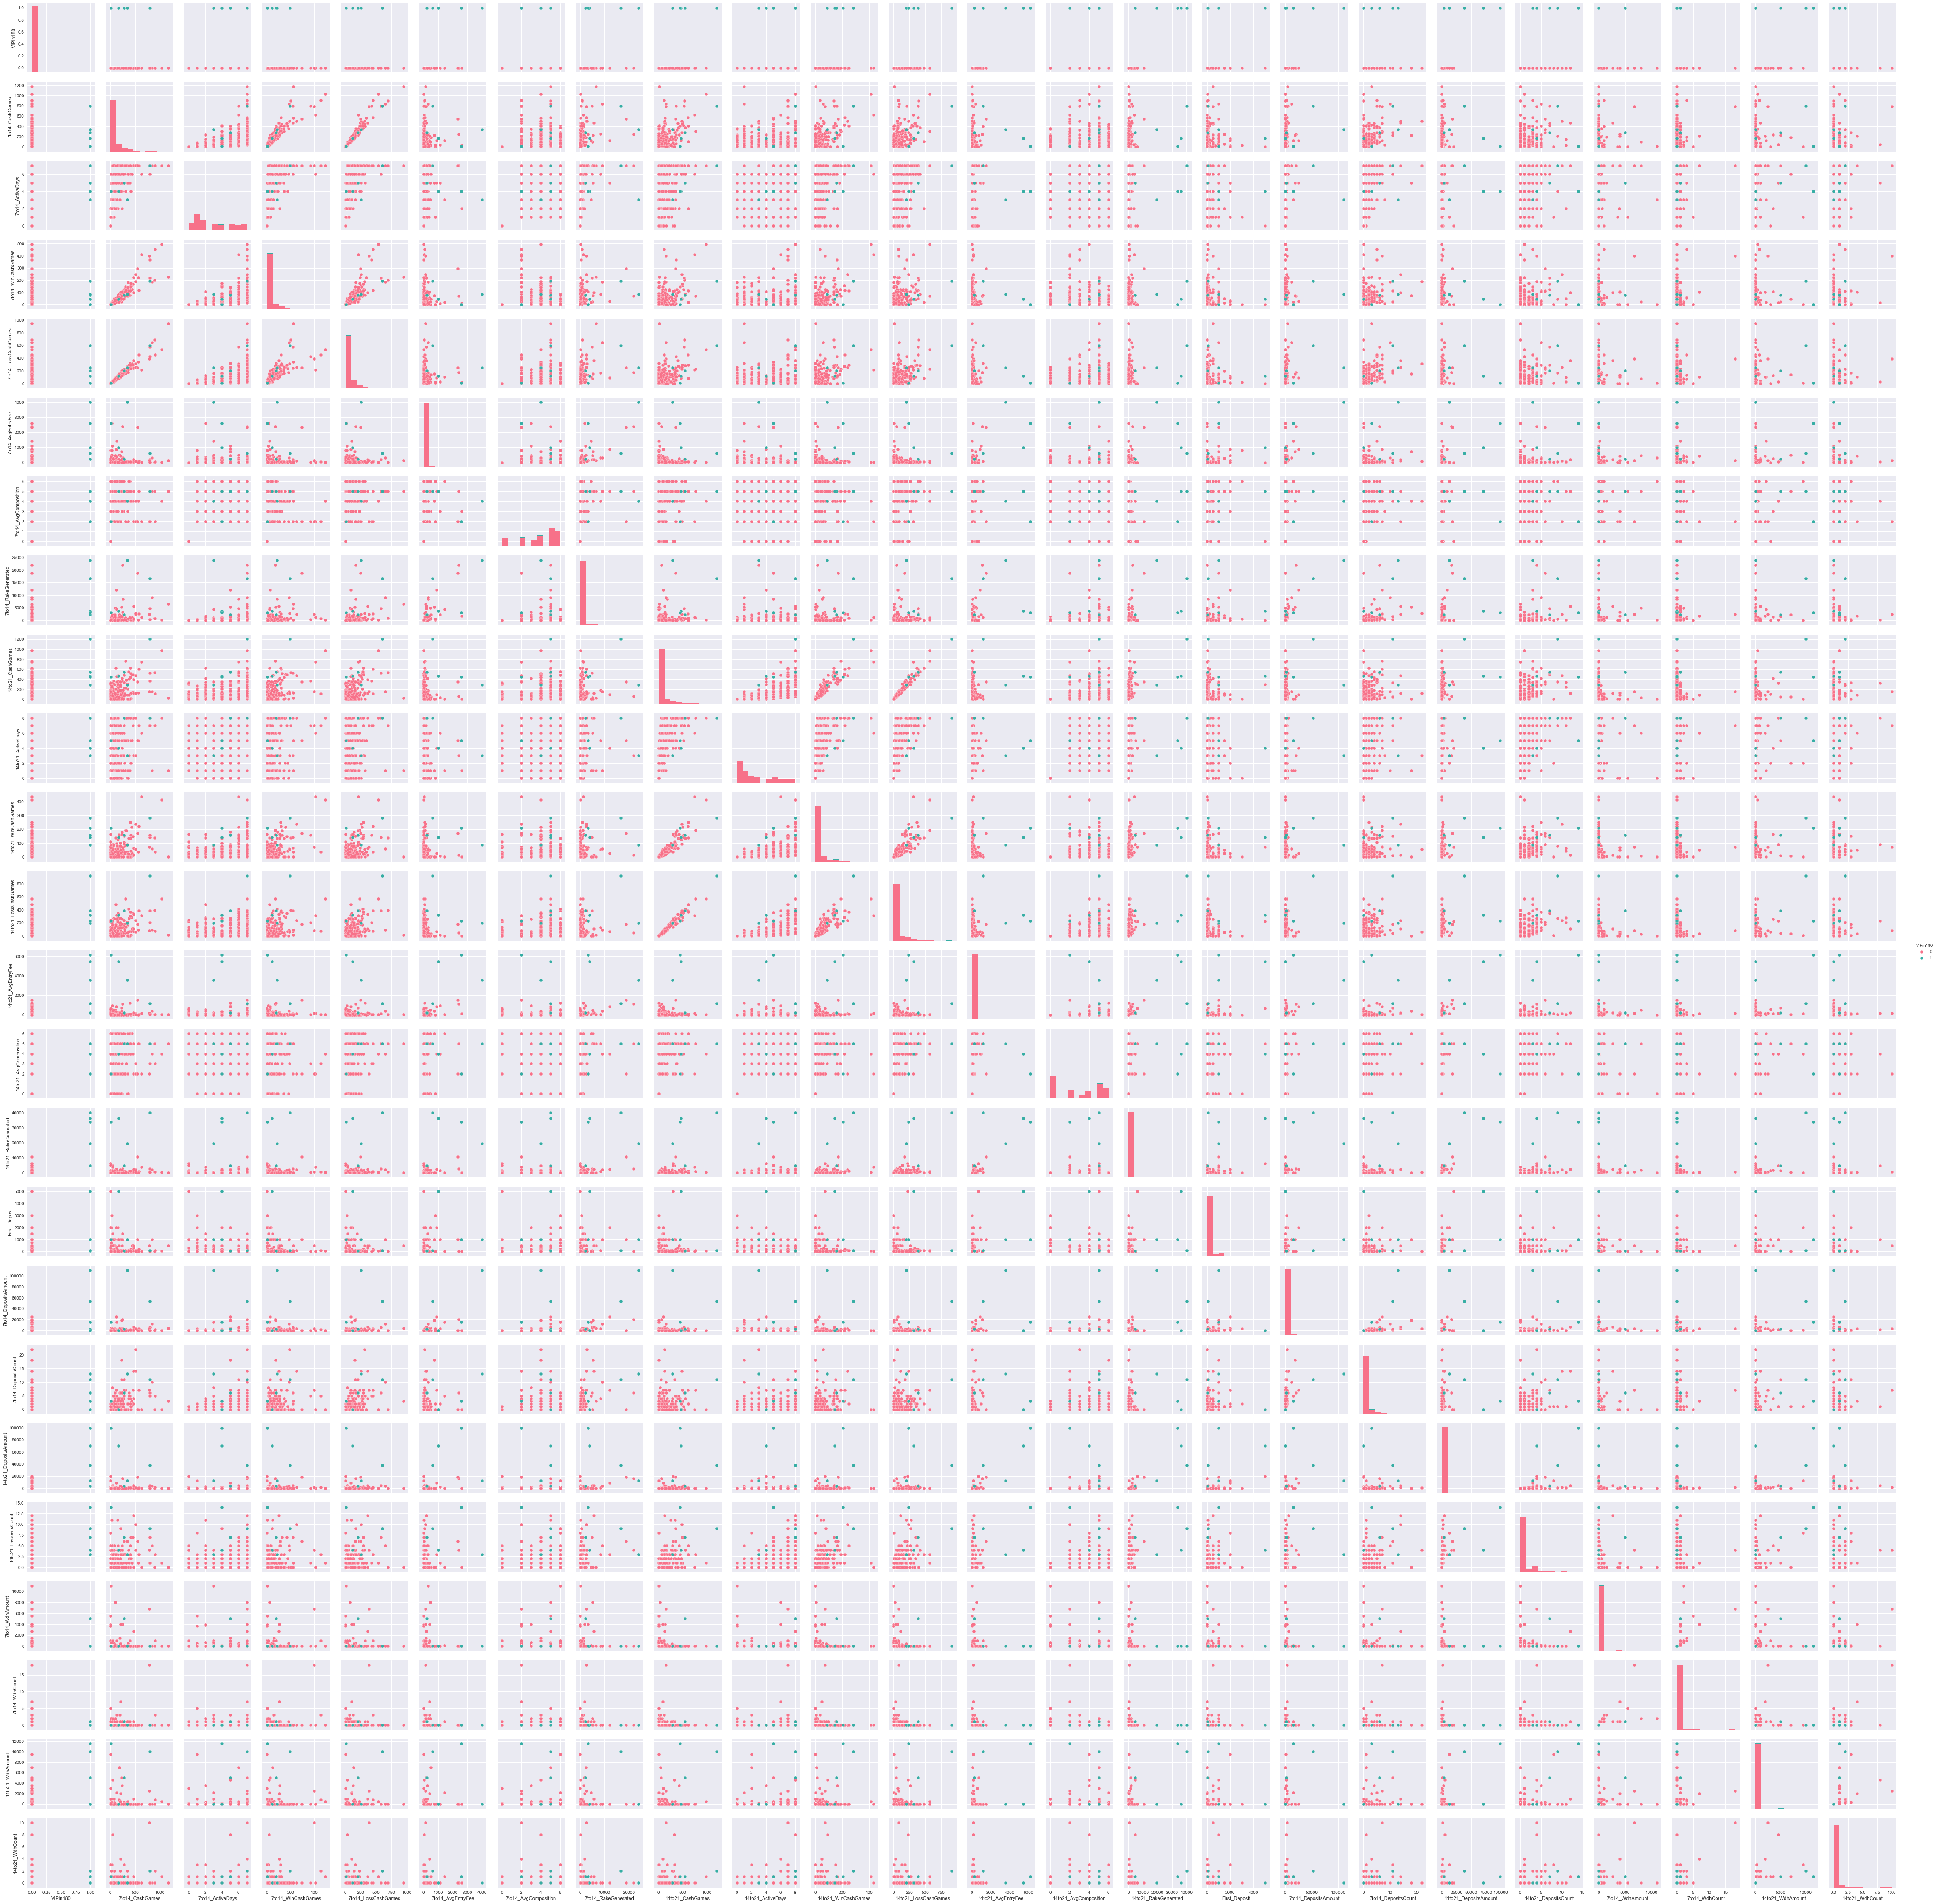

In [166]:
tmp = pd.concat([newdf[categorical],newdf[continuous]],axis=1)
sns.pairplot(tmp[0:500],hue='VIPin180',palette="husl")

In [167]:
newdf.columns

Index(['7to14_CashGames', '7to14_ActiveDays', '7to14_WinCashGames',
       '7to14_LossCashGames', '7to14_AvgEntryFee', '7to14_AvgComposition',
       '7to14_RakeGenerated', '14to21_CashGames', '14to21_ActiveDays',
       '14to21_WinCashGames', '14to21_LossCashGames', '14to21_AvgEntryFee',
       '14to21_AvgComposition', '14to21_RakeGenerated', 'First_Deposit',
       '7to14_DepositsAmount', '7to14_DepositsCount', '14to21_DepositsAmount',
       '14to21_DepositsCount', '7to14_WdhAmount', '7to14_WdhCount',
       '14to21_WdhAmount', '14to21_WdhCount', 'DaystoVIP', 'UserID',
       'firstDepositDate', 'VIPin180'],
      dtype='object')

In [168]:
#Split dataset into train_test set
from sklearn.ensemble import RandomForestClassifier
import itertools

#For splitting data in train and test set; 
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold

from sklearn.metrics import confusion_matrix, roc_curve,accuracy_score, roc_auc_score, f1_score, auc, classification_report, confusion_matrix

In [169]:
#train_test_split is not stratified by default, so it could be that classifier is always just predicting the most common class A
#

Separate input features (X) and target variable (y)

y = newdf.VIPin180

X = newdf.drop(['VIPin180','DaystoVIP','UserID'], axis=1)

In [170]:
#2016 train set and 2017 test set
train = newdf[newdf.firstDepositDate < '2017-02-01']
test = newdf[newdf.firstDepositDate >= '2017-02-01']

train_refined = newdf[newdf.firstDepositDate < '2017-02-01']
test_refined = newdf[newdf.firstDepositDate >= '2017-02-01']

In [171]:
print(train_refined.shape)
print(test_refined.shape)

(31130, 27)
(8524, 27)


In [172]:
#Remove firstDepositDate from both train and test
train_refined = train_refined.drop('firstDepositDate',axis=1)
test_refined = test_refined.drop('firstDepositDate',axis=1)

In [173]:
train_refined = train_refined.drop(['DaystoVIP','UserID'],axis=1)
test_refined = test_refined.drop(['DaystoVIP','UserID'],axis=1)

In [174]:
# Separate input features (X) and target variable (y)
y_train = train_refined['VIPin180']
X_train = train_refined.drop('VIPin180',axis=1)

y_test = test_refined['VIPin180']
X_test = test_refined.drop('VIPin180',axis=1)

#y = newdf.VIPin180
#X = newdf.drop(['VIPin180','DaystoVIP','UserID'], axis=1)


#Split in train and test; Stratified = Y; 80/20
#X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.20)

In [175]:
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(31130,)
(31130, 23)
(8524,)
(8524, 23)


In [176]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([30681,   449], dtype=int64))

In [177]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([8433,   91], dtype=int64))

**Train Random Forest **

In [178]:
# Plot CV scores of a 2D grid search
def plotGridResults2D(x, y, x_label, y_label, grid_scores):
    
    scores = [s[1] for s in grid_scores]
    scores = np.array(scores).reshape(len(x), len(y))

    plt.figure()
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.RdYlGn)
    plt.xlabel(y_label)
    plt.ylabel(x_label)
    plt.colorbar()
    plt.xticks(np.arange(len(y)), y, rotation=45)
    plt.yticks(np.arange(len(x)), x)
    plt.title('Validation accuracy')

# Plot CV scores of a 1D "grid" search (a very narrow "grid")
def plotGridResults1D(x, x_label, grid_scores):
    
    scores = np.array([s[1] for s in grid_scores])
    
    plt.figure()
    plt.plot(scores)
    plt.xlabel(x_label)
    plt.ylabel('Score')
    plt.xticks(np.arange(len(x)), x, rotation=45)
    plt.title('Validation accuracy')
    
#Plot Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [179]:
# Train model
clf_4 = RandomForestClassifier(class_weight='balanced')
clf_4.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)>

In [180]:
estimators_range = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25])
depth_range = np.array([11, 21, 35, 51, 75, 101, 151, 201, 251, 301, 351, 401, 451, 501])
kfold = 5
skf = StratifiedKFold(n_splits=kfold, random_state=42)

model_grid= [{'max_depth': depth_range, 'n_estimators': estimators_range}]
grid = GridSearchCV(clf_4, model_grid, cv= StratifiedKFold(n_splits=5, random_state=42) , n_jobs=8, scoring='roc_auc')


grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=8,
       param_grid=[{'max_depth': array([ 11,  21,  35,  51,  75, 101, 151, 201, 251, 301, 351, 401, 451, 501]), 'n_estimators': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 15, 20, 25])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


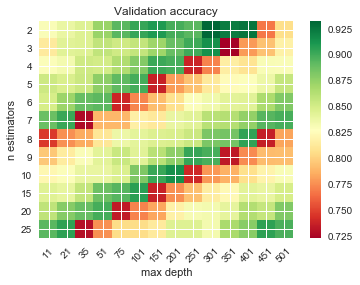

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=11, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [181]:
plotGridResults2D(estimators_range, depth_range, 'n estimators', 'max depth',grid.grid_scores_)
plt.show()

# Final result
bestClf = grid.best_estimator_
print(bestClf)

**Testing the model **

             precision    recall  f1-score   support

          0       1.00      0.99      0.99      8433
          1       0.34      0.65      0.44        91

avg / total       0.99      0.98      0.99      8524

Accuracy Score 0.982637259503
No of classes [0 1]
ROC_AUC_SCORE 0.953140005968
Normalized confusion matrix
[[ 0.98624452  0.01375548]
 [ 0.35164835  0.64835165]]


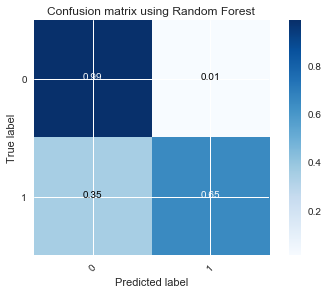

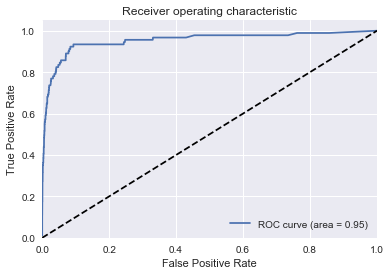

In [182]:
# Ok, I actally want to choose these paramters myself!
bestClf = RandomForestClassifier(max_depth=11, n_estimators=25,max_features='auto', class_weight='balanced', random_state=0)

# Learn on train for test
bestClf.fit(X_train, y_train)
y_pred = bestClf.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))
print("Accuracy Score", accuracy_score(y_test, y_pred) )

# Is our model still predicting just one class?
print("No of classes", np.unique(y_pred))

# Predict scores
y_score = bestClf.predict_proba(X_test)[:,1]

# What about AUROC?
print("ROC_AUC_SCORE", roc_auc_score(y_test, y_score) )

#Look at Confusion Matrix
conf = confusion_matrix(y_test, y_pred)
plt.figure()
clas= np.array([0,1])
plot_confusion_matrix(conf, classes= clas, normalize=True,
                      title='Confusion matrix using Random Forest')

# ROC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

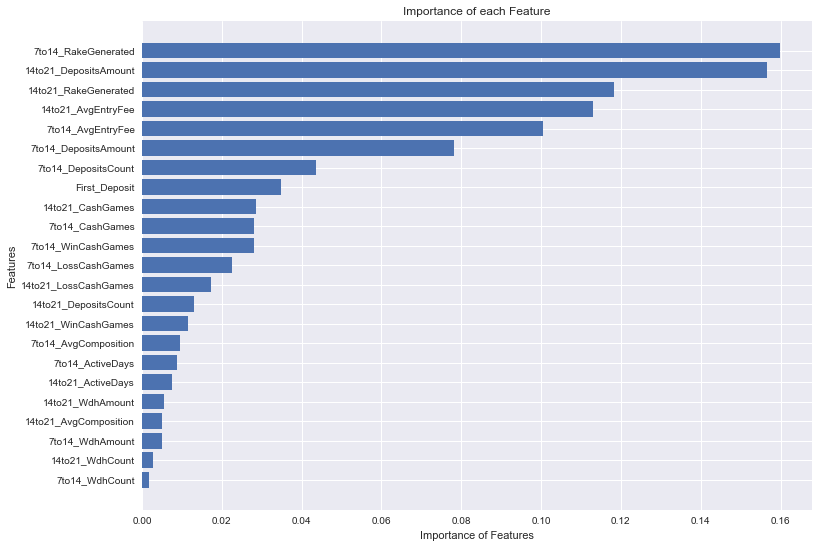

In [183]:
imp = bestClf.feature_importances_
names = X_train.columns
imp, names = zip(*sorted(zip(imp, names)))

fig = plt.figure(figsize=(12,9))
plt.barh(range(len(names)), imp, align= 'center')
plt.yticks(range(len(names)), names)

plt.xlabel('Importance of Features')
plt.ylabel('Features')
plt.title('Importance of each Feature')
plt.show()

In [184]:
#http://contrib.scikit-learn.org/imbalanced-learn/stable/auto_examples/ensemble/plot_comparison_bagging_classifier.html#sphx-glr-auto-examples-ensemble-plot-comparison-bagging-classifier-py
#http://bigdata-madesimple.com/dealing-with-unbalanced-class-svm-random-forest-and-decision-tree-in-python/
#https://elitedatascience.com/imbalanced-classes
#https://elitedatascience.com/feature-engineering-best-practices
#http://www.marcoaltini.com/blog/dealing-with-imbalanced-data-undersampling-oversampling-and-proper-cross-validation
#https://github.com/scikit-learn-contrib/imbalanced-learn
#https://www.svds.com/learning-imbalanced-classes/
#https://www.svds.com/classifiers2/
#https://silicon-valley-data-science.github.io/learning-from-imbalanced-classes/ImbalancedClasses.html

In [185]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [186]:
X_test

,7to14_CashGames,7to14_ActiveDays,7to14_WinCashGames,7to14_LossCashGames,7to14_AvgEntryFee,7to14_AvgComposition,7to14_RakeGenerated,14to21_CashGames,14to21_ActiveDays,14to21_WinCashGames,...,14to21_RakeGenerated,First_Deposit,7to14_DepositsAmount,7to14_DepositsCount,14to21_DepositsAmount,14to21_DepositsCount,7to14_WdhAmount,7to14_WdhCount,14to21_WdhAmount,14to21_WdhCount
28068,424.0,6.0,209.0,215.0,4.0,2.0,45.49,124.0,7.0,42.0,...,14.05,30.0,0.0,0.0,30.0,1.0,0.0,0.0,0.0,0.0
28069,155.0,6.0,26.0,129.0,8.0,6.0,54.27,85.0,4.0,13.0,...,15.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28070,79.0,5.0,28.0,51.0,272.0,4.0,734.70,76.0,4.0,28.0,...,595.00,1000.0,2000.0,2.0,2000.0,2.0,0.0,0.0,0.0,0.0
28071,452.0,6.0,136.0,316.0,10.0,5.0,196.46,713.0,8.0,287.0,...,175.67,30.0,750.0,5.0,400.0,2.0,0.0,0.0,0.0,0.0
28072,0.0,0.0,0.0,0.0,0.0,0.0,0.00,3.0,1.0,0.0,...,0.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28073,14.0,1.0,2.0,12.0,62.0,6.0,49.80,1.0,1.0,0.0,...,1.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28074,20.0,4.0,3.0,17.0,25.0,4.0,44.40,10.0,2.0,1.0,...,3.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28075,2.0,1.0,0.0,2.0,10.0,4.0,3.00,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28076,1.0,1.0,0.0,1.0,25.0,2.0,3.75,0.0,0.0,0.0,...,0.00,30.0,25.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28077,224.0,6.0,38.0,186.0,15.0,5.0,256.77,83.0,6.0,13.0,...,120.16,25.0,500.0,20.0,200.0,8.0,700.0,7.0,0.0,0.0


In [187]:
#X = pd.concat([X_test, y_test], axis=1)
#X = pd.concat([X, y_pred])
predicted = pd.DataFrame(columns=['Prediction'],index=test.index, data=y_pred)

In [188]:
X = pd.concat([test, predicted], axis=1)

In [189]:
X

,7to14_CashGames,7to14_ActiveDays,7to14_WinCashGames,7to14_LossCashGames,7to14_AvgEntryFee,7to14_AvgComposition,7to14_RakeGenerated,14to21_CashGames,14to21_ActiveDays,14to21_WinCashGames,...,14to21_DepositsCount,7to14_WdhAmount,7to14_WdhCount,14to21_WdhAmount,14to21_WdhCount,DaystoVIP,UserID,firstDepositDate,VIPin180,Prediction
28068,424.0,6.0,209.0,215.0,4.0,2.0,45.49,124.0,7.0,42.0,...,1.0,0.0,0.0,0.0,0.0,-1.0,"2,010,579",2017-02-21,0,0
28069,155.0,6.0,26.0,129.0,8.0,6.0,54.27,85.0,4.0,13.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,"2,143,573",2017-04-22,0,0
28070,79.0,5.0,28.0,51.0,272.0,4.0,734.70,76.0,4.0,28.0,...,2.0,0.0,0.0,0.0,0.0,-1.0,"2,153,973",2017-04-19,0,0
28071,452.0,6.0,136.0,316.0,10.0,5.0,196.46,713.0,8.0,287.0,...,2.0,0.0,0.0,0.0,0.0,-1.0,"2,016,114",2017-02-25,0,0
28072,0.0,0.0,0.0,0.0,0.0,0.0,0.00,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,"2,091,813",2017-03-27,0,0
28073,14.0,1.0,2.0,12.0,62.0,6.0,49.80,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,"1,988,385",2017-02-11,0,0
28074,20.0,4.0,3.0,17.0,25.0,4.0,44.40,10.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,"2,158,709",2017-04-27,0,0
28075,2.0,1.0,0.0,2.0,10.0,4.0,3.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,"2,138,543",2017-04-14,0,0
28076,1.0,1.0,0.0,1.0,25.0,2.0,3.75,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,"2,071,837",2017-03-17,0,0
28077,224.0,6.0,38.0,186.0,15.0,5.0,256.77,83.0,6.0,13.0,...,8.0,700.0,7.0,0.0,0.0,-1.0,"2,115,741",2017-04-04,0,0


In [190]:
X.to_csv('predictions.csv', index=False)